In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder,label_binarize,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [26]:
data=pd.read_csv("emotions.csv")

In [27]:
data.shape

(2132, 2549)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [29]:
data.isna().sum().sum()

0

In [30]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [31]:
labels={'NEGATIVE':0, 'NEUTRAL':1, 'POSITIVE':2}

In [32]:
data['label']=data['label'].replace(labels)

In [33]:
X=data.drop(['label'],axis=1)

In [34]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [35]:
y=data[['label']]

In [36]:
y

,label
0,0
1,1
2,2
3,2
4,1
...,...
2127,1
2128,2
2129,0
2130,0


In [40]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

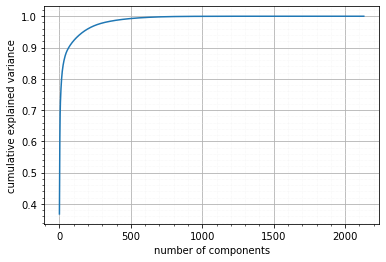

In [43]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [44]:
pca = PCA(n_components = 145)
X_trans = pca.fit_transform(X_new)

In [45]:
X_fin = pd.DataFrame(data=X_trans)
X_fin.head(10)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,35.657801,22.587212,-22.876329,-0.402041,0.135878,0.300305,0.371889,-5.019778,-3.524267,1.259205,...,1.174696,0.458124,-0.260232,0.091898,0.841540,0.336955,1.992495,-1.742152,0.204135,1.571823
1,-21.885579,-2.029729,0.034290,-1.610424,-0.794432,0.119247,-0.723485,5.503747,-1.909677,-0.405101,...,-0.440135,-1.167405,1.246567,0.634037,0.866284,0.522351,0.066730,0.232953,-0.926364,-1.373185
2,35.274053,-14.873318,5.623630,-1.608727,0.594164,-7.690380,-0.609083,1.876396,2.300632,19.663583,...,-2.210574,-3.159369,-3.179468,2.006481,0.290893,-1.080108,-0.353747,-0.286696,0.551865,-0.304173
3,2.087139,-20.876049,24.824895,-1.996328,-0.399807,-0.460872,2.148957,-4.536861,-2.997985,2.219055,...,0.934565,0.471845,-0.829024,0.736901,0.022280,0.664207,2.126773,0.645427,-0.005255,-0.990038
4,-25.229455,-2.204738,0.925049,0.763751,0.181120,-3.126072,-1.850139,5.979478,3.539539,12.691276,...,0.175553,-2.004116,1.165175,1.457561,-0.478686,0.016829,-0.055753,-0.372893,0.541408,0.174259
5,-22.221918,-2.691883,0.407000,-1.202683,-0.756296,0.151724,-0.771160,6.233713,-2.761318,0.151608,...,0.627645,0.085485,0.317322,-0.528351,-0.612198,-0.820472,0.783966,-0.900562,-0.104312,-0.145119
6,-19.085045,-5.241313,0.941209,-0.812583,-1.164517,-0.883325,-1.201025,0.583197,3.916153,-0.962244,...,0.236582,0.943133,-0.402507,-2.432069,0.329717,-0.135831,0.203569,-2.150016,-0.568342,0.476644
7,2.710257,21.533988,-39.883499,1.684440,1.312737,1.307884,-0.297145,-2.087967,-3.444867,2.411370,...,0.045778,-0.539450,-0.264403,-0.320138,0.196679,0.499353,-0.867806,1.108853,-1.333744,-0.535171
8,-17.410045,-1.030366,-0.007529,-2.728940,-0.993025,2.049574,0.274726,-1.332270,1.974466,-5.244219,...,-0.001848,0.211529,-0.918996,-1.487602,-0.835391,-0.473537,-1.869470,0.172502,-0.647503,-0.819511
9,29.426873,13.365923,12.501691,-2.335001,-1.373872,-1.957218,-0.727321,-5.627730,-1.088296,0.775392,...,0.515876,-0.685975,0.174033,-1.304339,0.458252,-0.512451,-0.115366,0.023550,-0.179766,0.008290


In [46]:
X_fin=X_fin.values
y=y.values

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.25,random_state=42)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [49]:
X_train.shape

(1279, 145)

In [50]:
y_train.shape

(1279, 1)

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model = GaussianNB()

In [53]:
model.fit(X_train, y_train)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [54]:
y_pred=model.predict(X_test)

In [63]:
y_pred_train=model.predict(X_train)

In [64]:
y_pred_val=model.predict(X_val)

In [65]:
y_new=model.predict(X_fin)

In [66]:
train_acc=model.score(X_train,y_train)
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 76.466%


In [67]:
test_acc=model.score(X_test,y_test)
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 74.296%


In [68]:
val_acc=model.score(X_val,y_val)
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 78.125%


In [69]:
y_pred

array([1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0,

In [70]:
y_pred[12]

0

In [71]:
y_test[12]

array([0], dtype=int64)

In [72]:
y_test1=np.argmax(y_test, axis=1)

In [74]:
y_pred1=np.argmax(y_pred)

In [76]:
confusion_matrix(y_test,y_pred)

array([[156,   0,  23],
       [  0, 158,  20],
       [ 49,  45,  82]], dtype=int64)

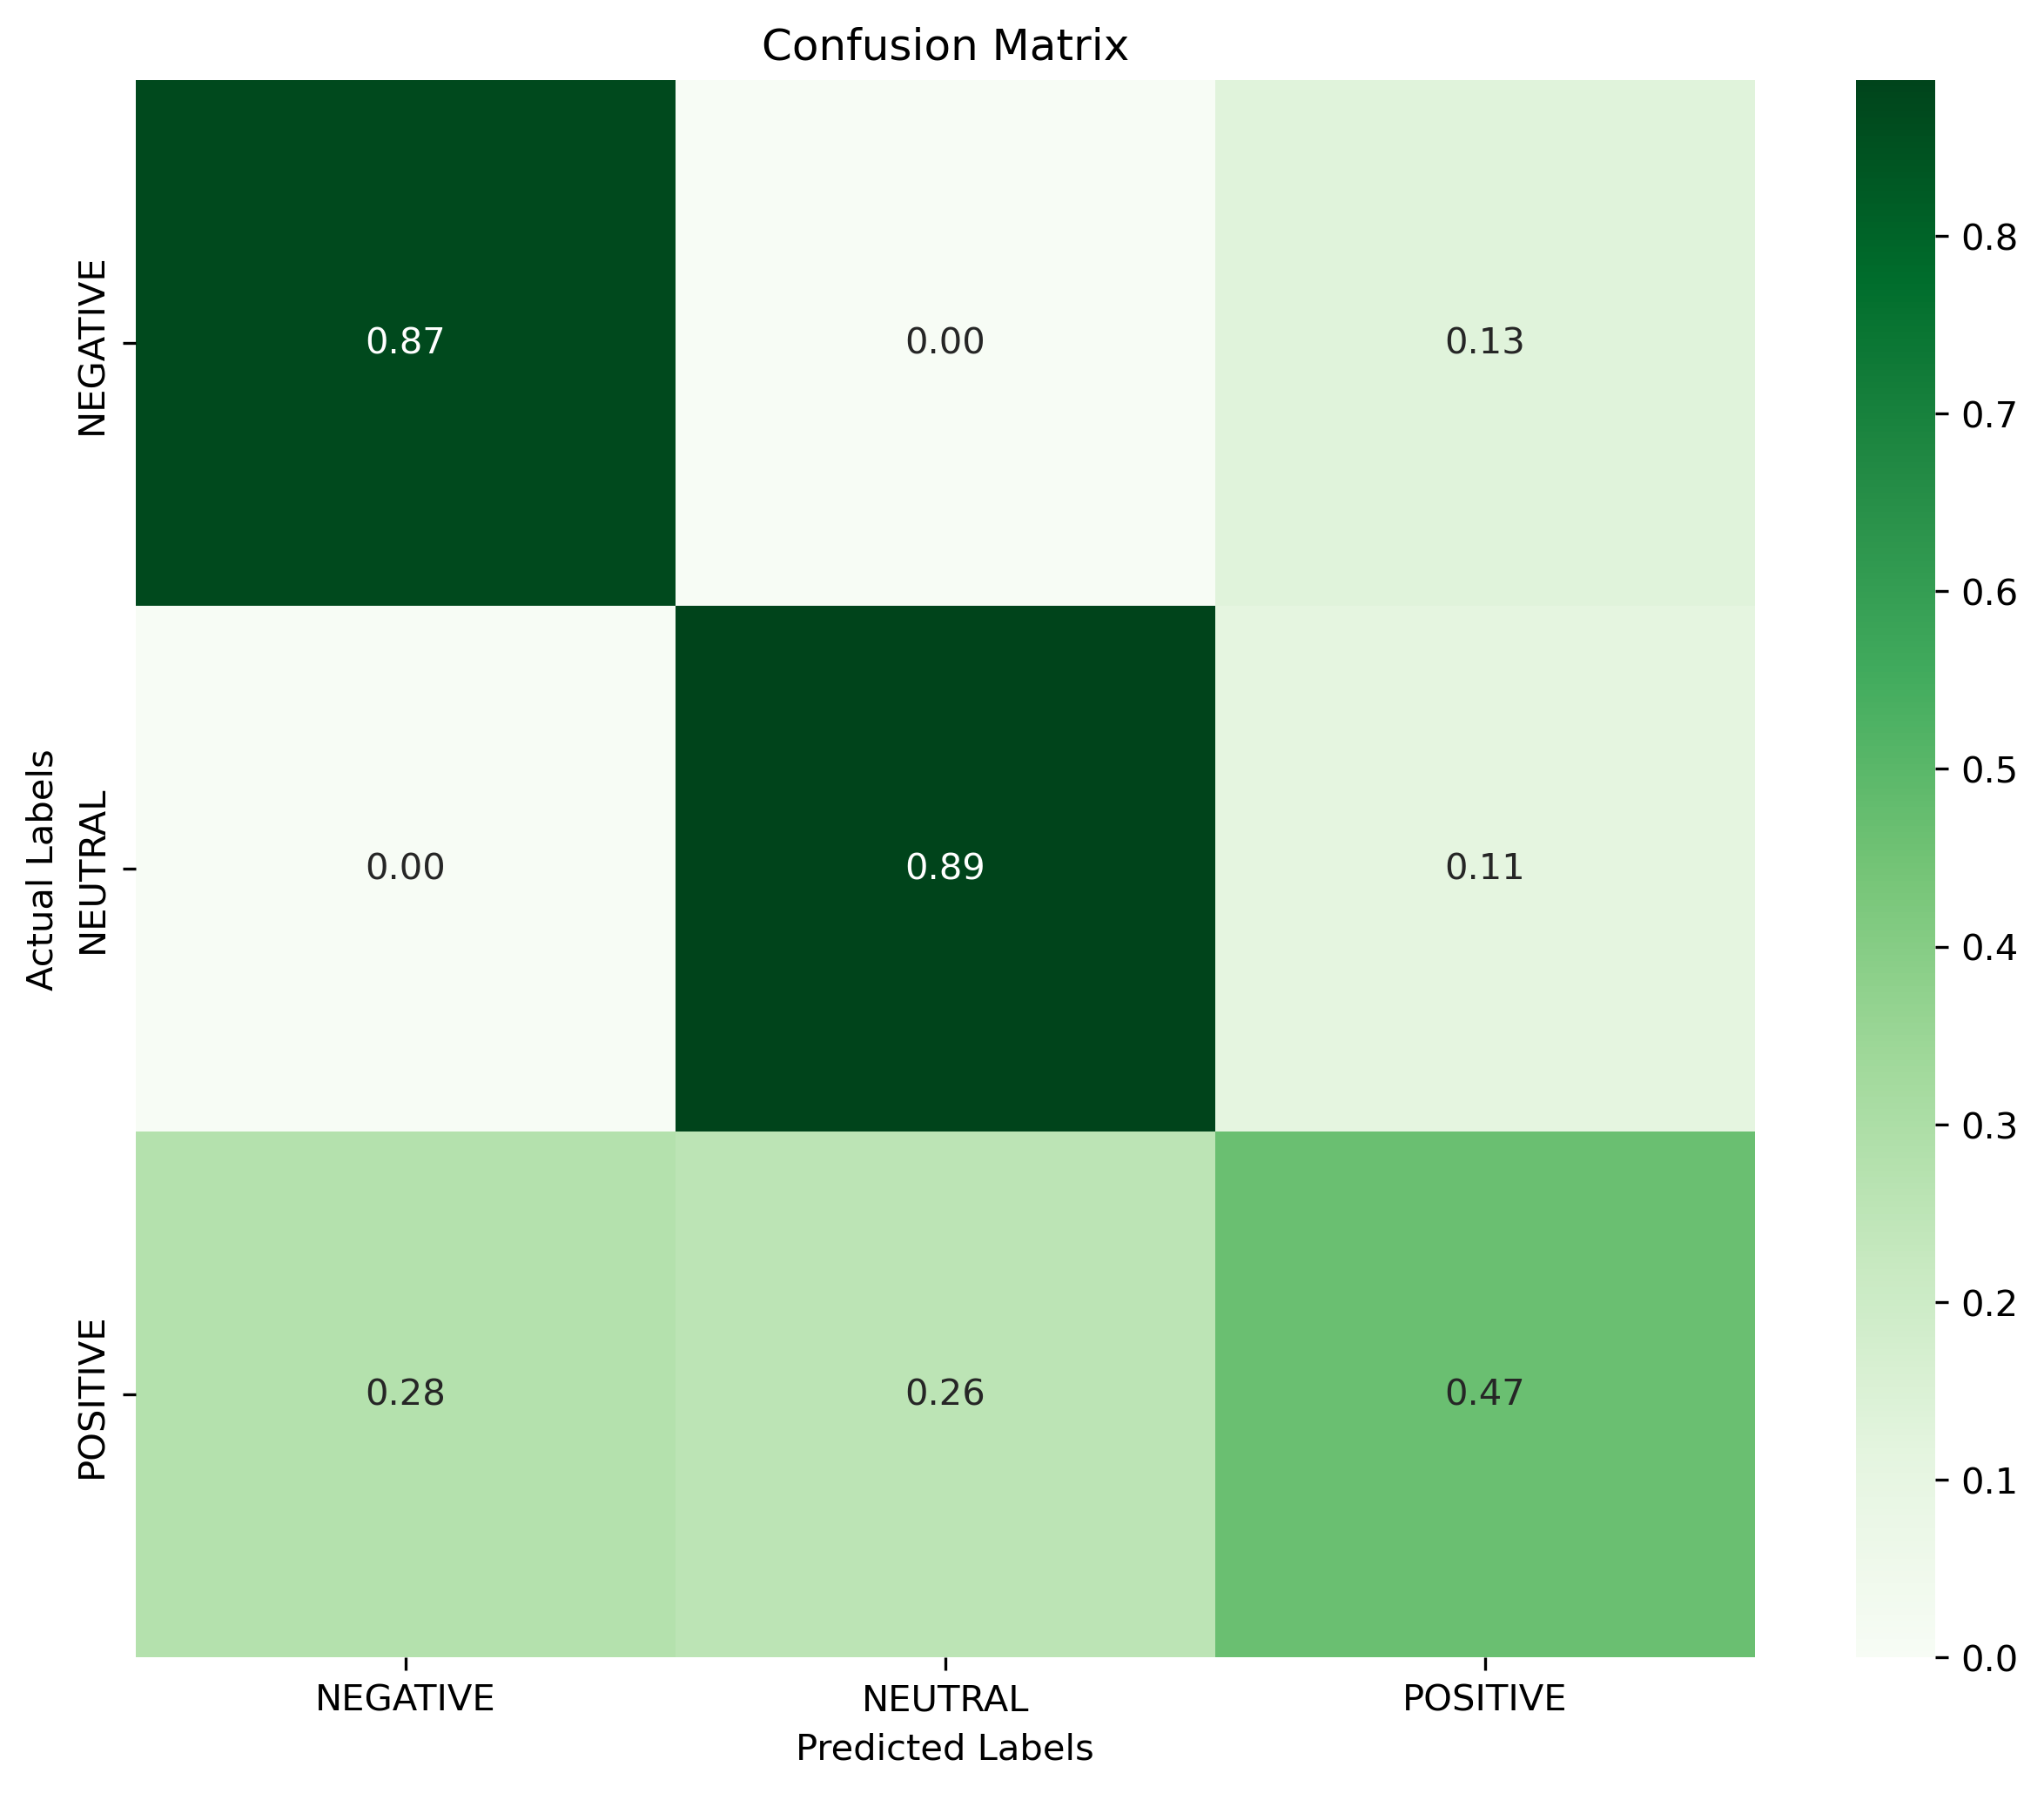

In [78]:
conf_matr = confusion_matrix(y_test,y_pred)

CLASSES=['NEGATIVE','NEUTRAL','POSITIVE']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [79]:
print("classification_report\n",classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       179
           1       0.78      0.89      0.83       178
           2       0.66      0.47      0.54       176

    accuracy                           0.74       533
   macro avg       0.73      0.74      0.73       533
weighted avg       0.73      0.74      0.73       533



In [80]:
y_test1=y_test.flatten()

In [81]:
pred_prob = model.predict_proba(X_test)

In [82]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test1,pred_prob,multi_class='ovo')

In [83]:
auc

0.905507302562376

In [91]:
new_pred=label_binarize(y_pred,classes=np.unique(y_pred))
new_test=label_binarize(y_test1,classes=np.unique(y_test1))
classes=np.unique(y_pred)

In [85]:
from sklearn.metrics import roc_curve

In [99]:
y_train1=y_train.flatten()

In [103]:
new_train=label_binarize(y_train1,classes=np.unique(y_train1))

In [105]:
new_train_pred=label_binarize(y_pred_train,classes=np.unique(y_pred_train))

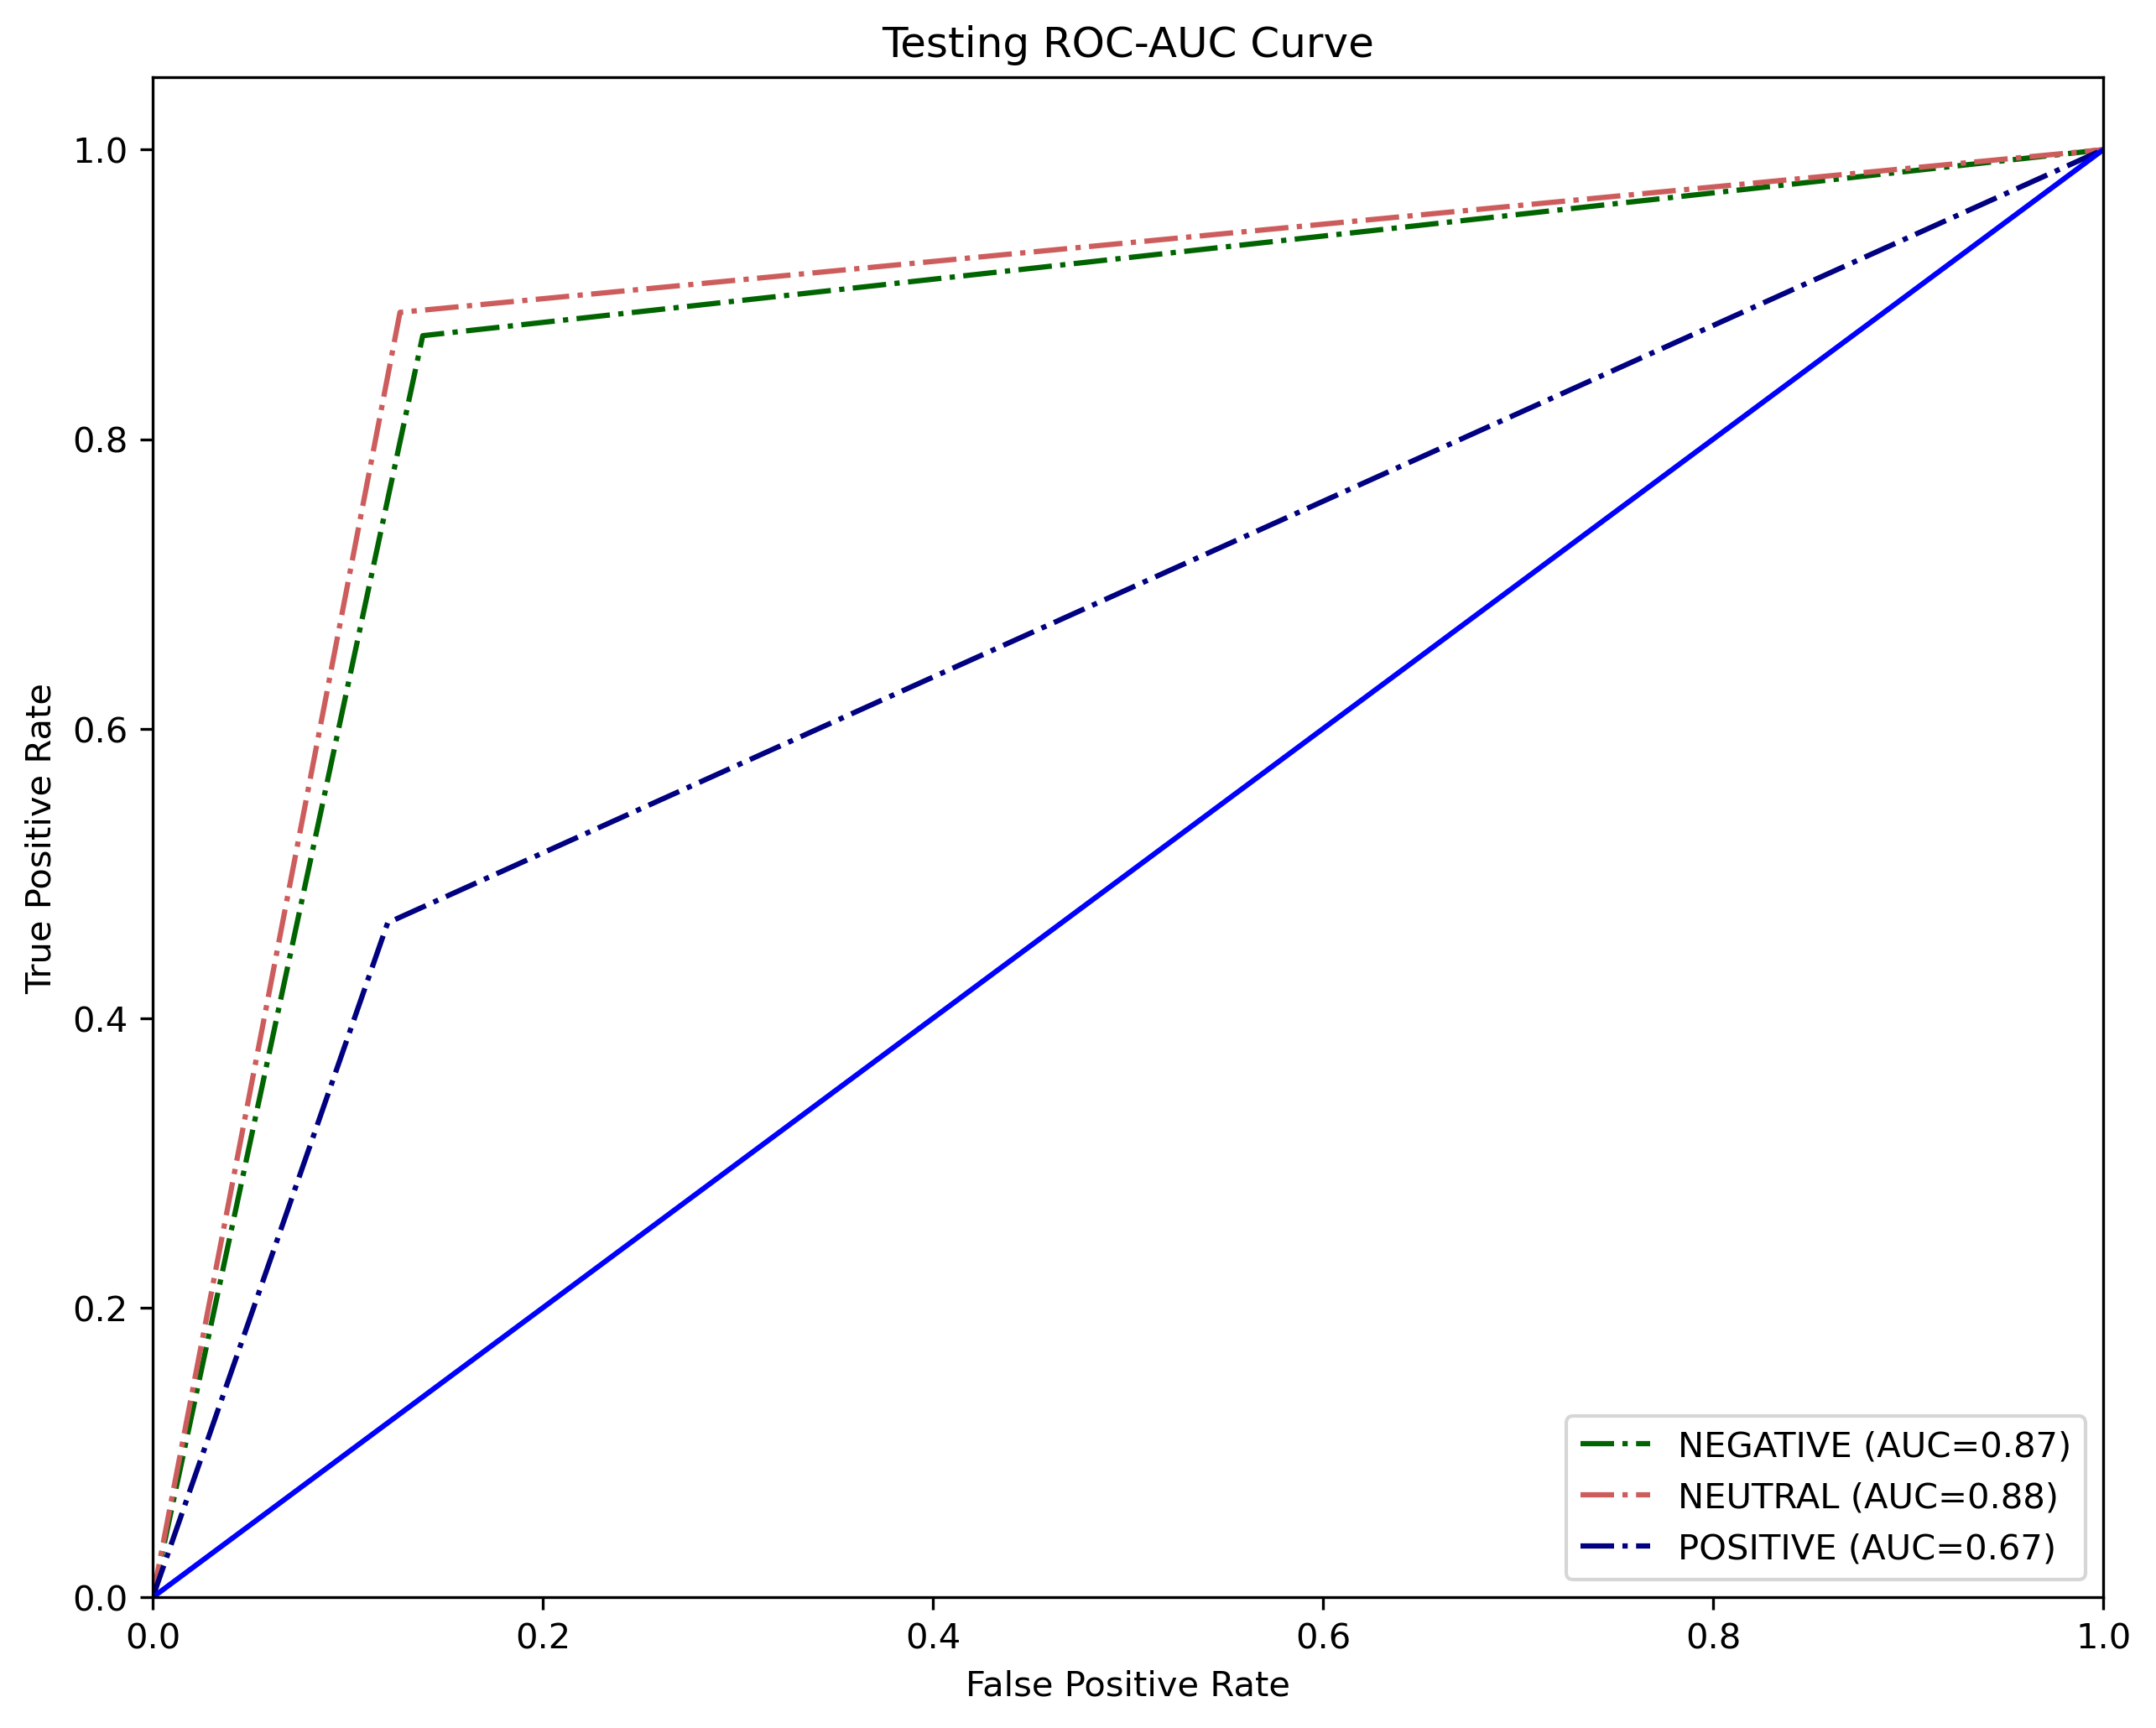

In [87]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

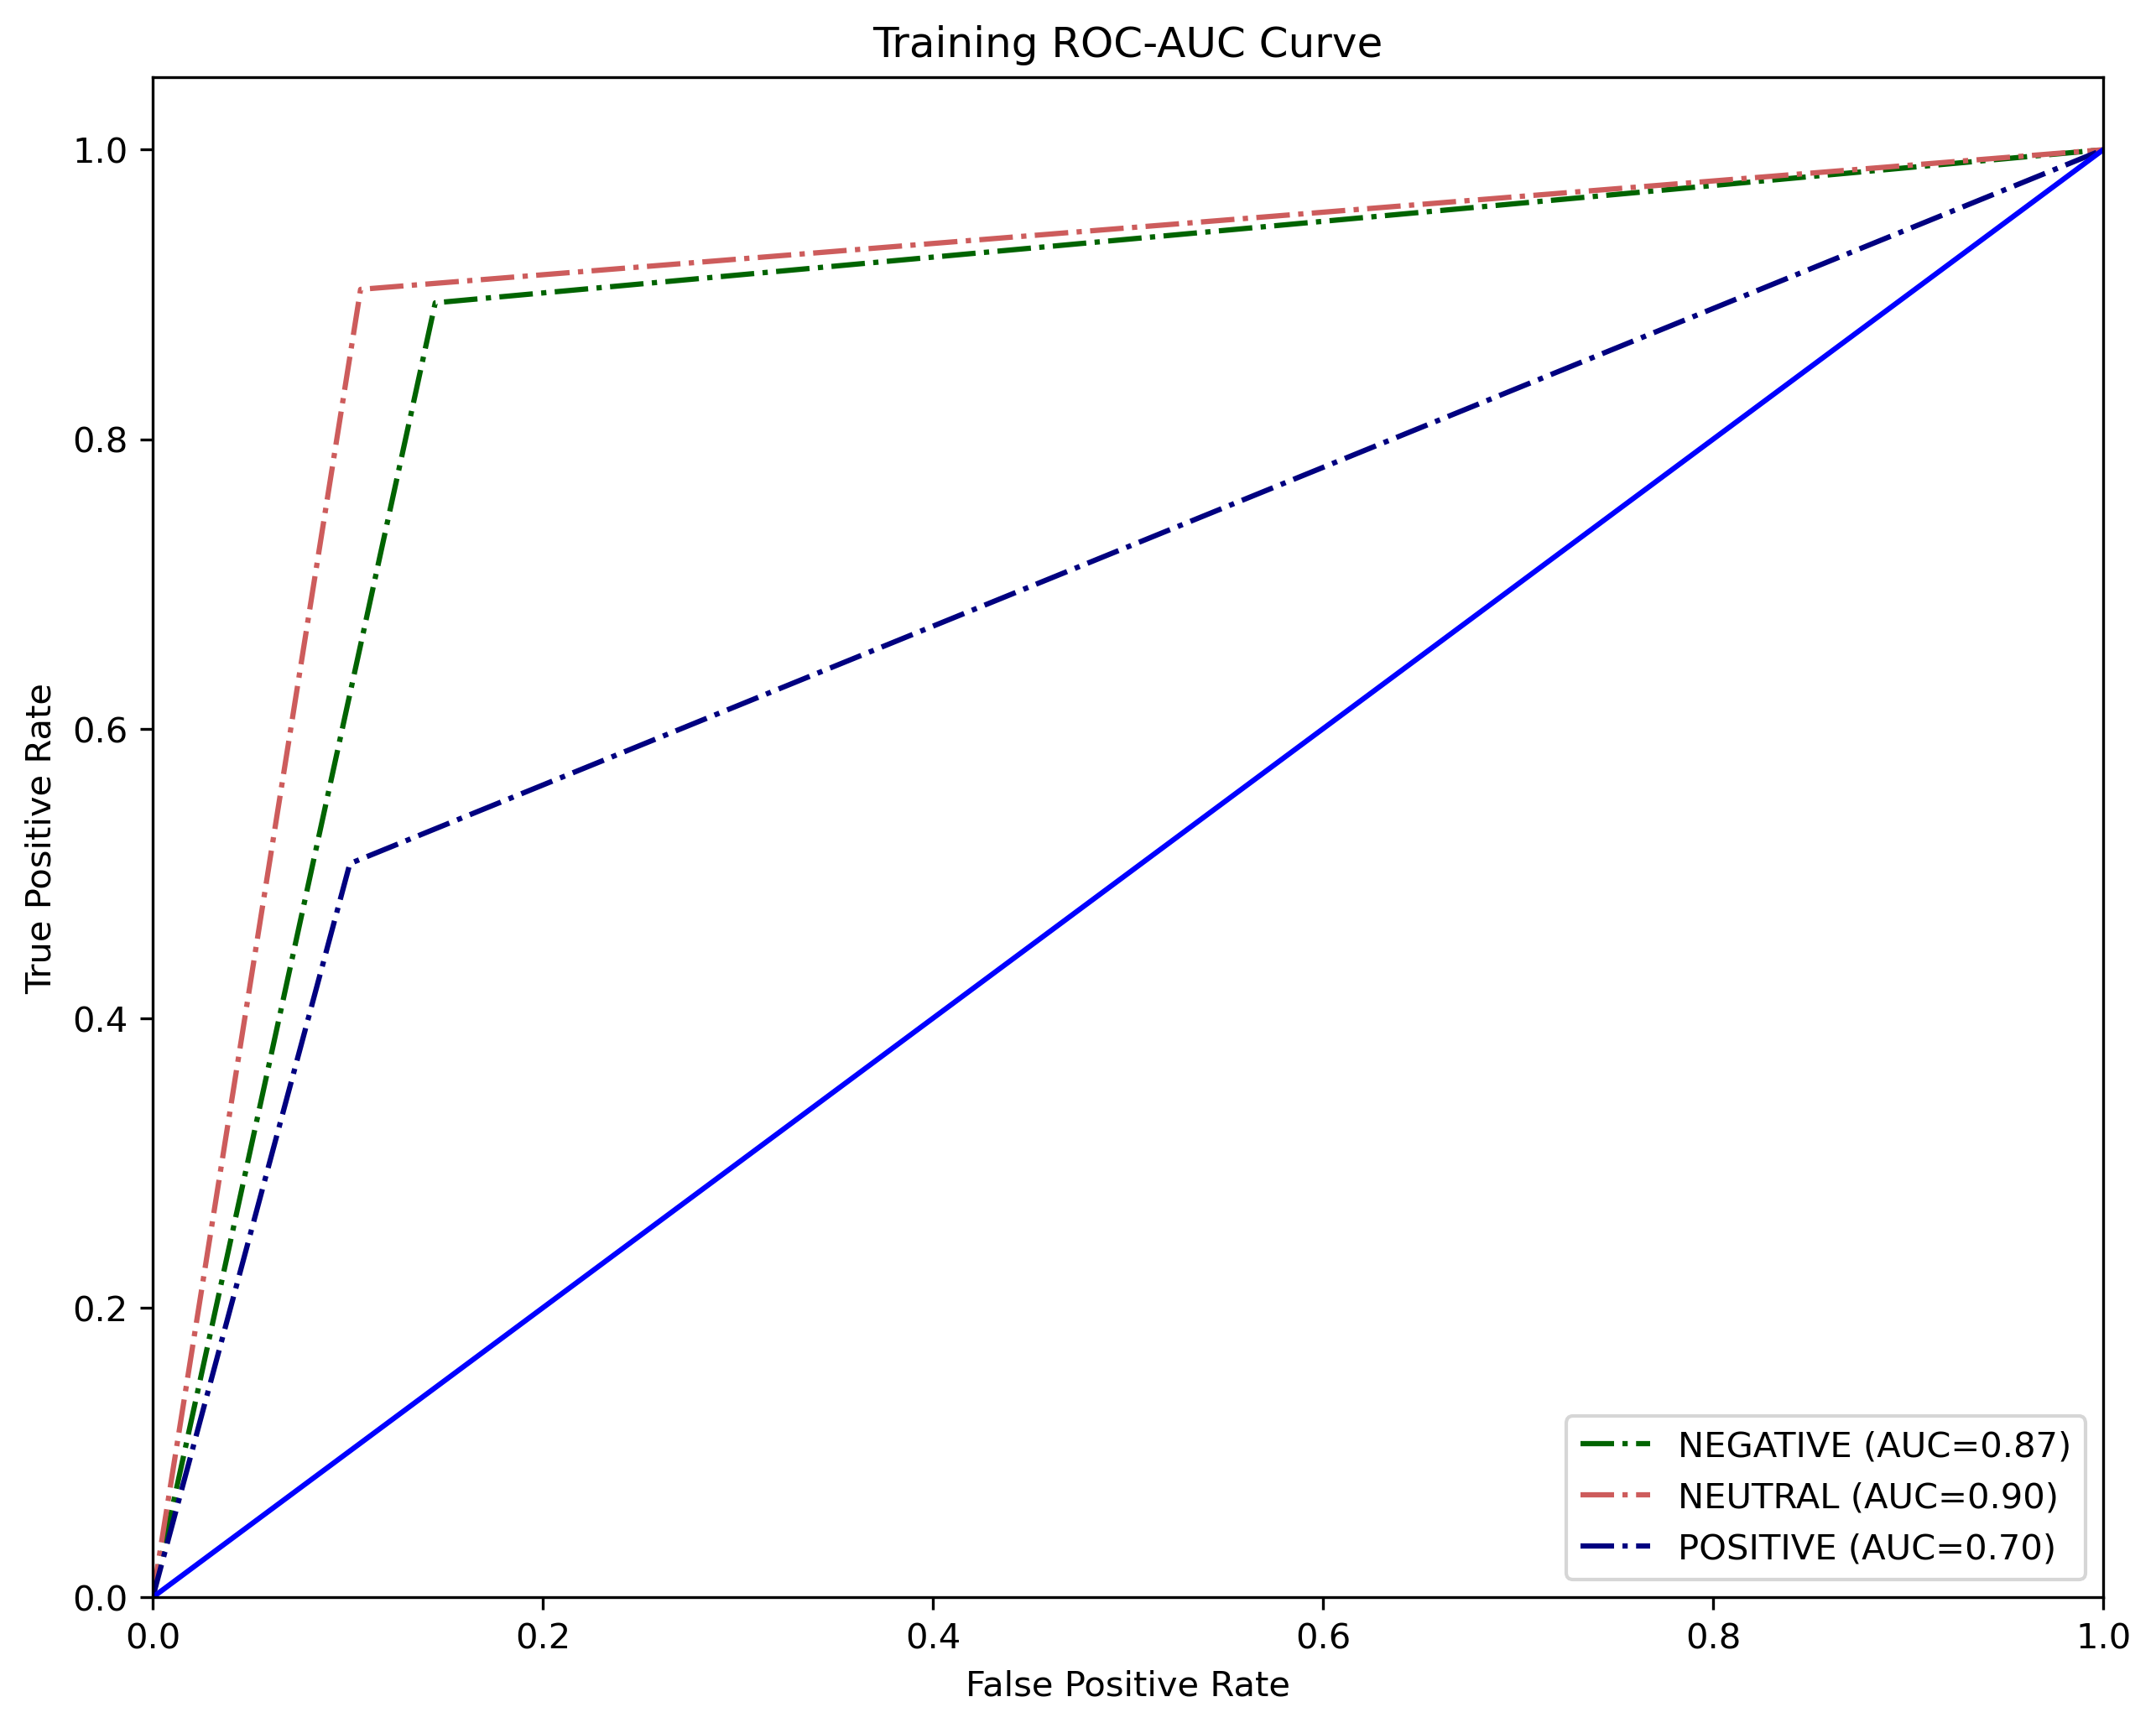

In [107]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_train[:,i],new_train_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

In [110]:
y_val1=y_val.flatten()

In [111]:
new_val=label_binarize(y_val1,classes=np.unique(y_val1))

In [112]:
new_pred_val=label_binarize(y_pred_val,classes=np.unique(y_pred_val))

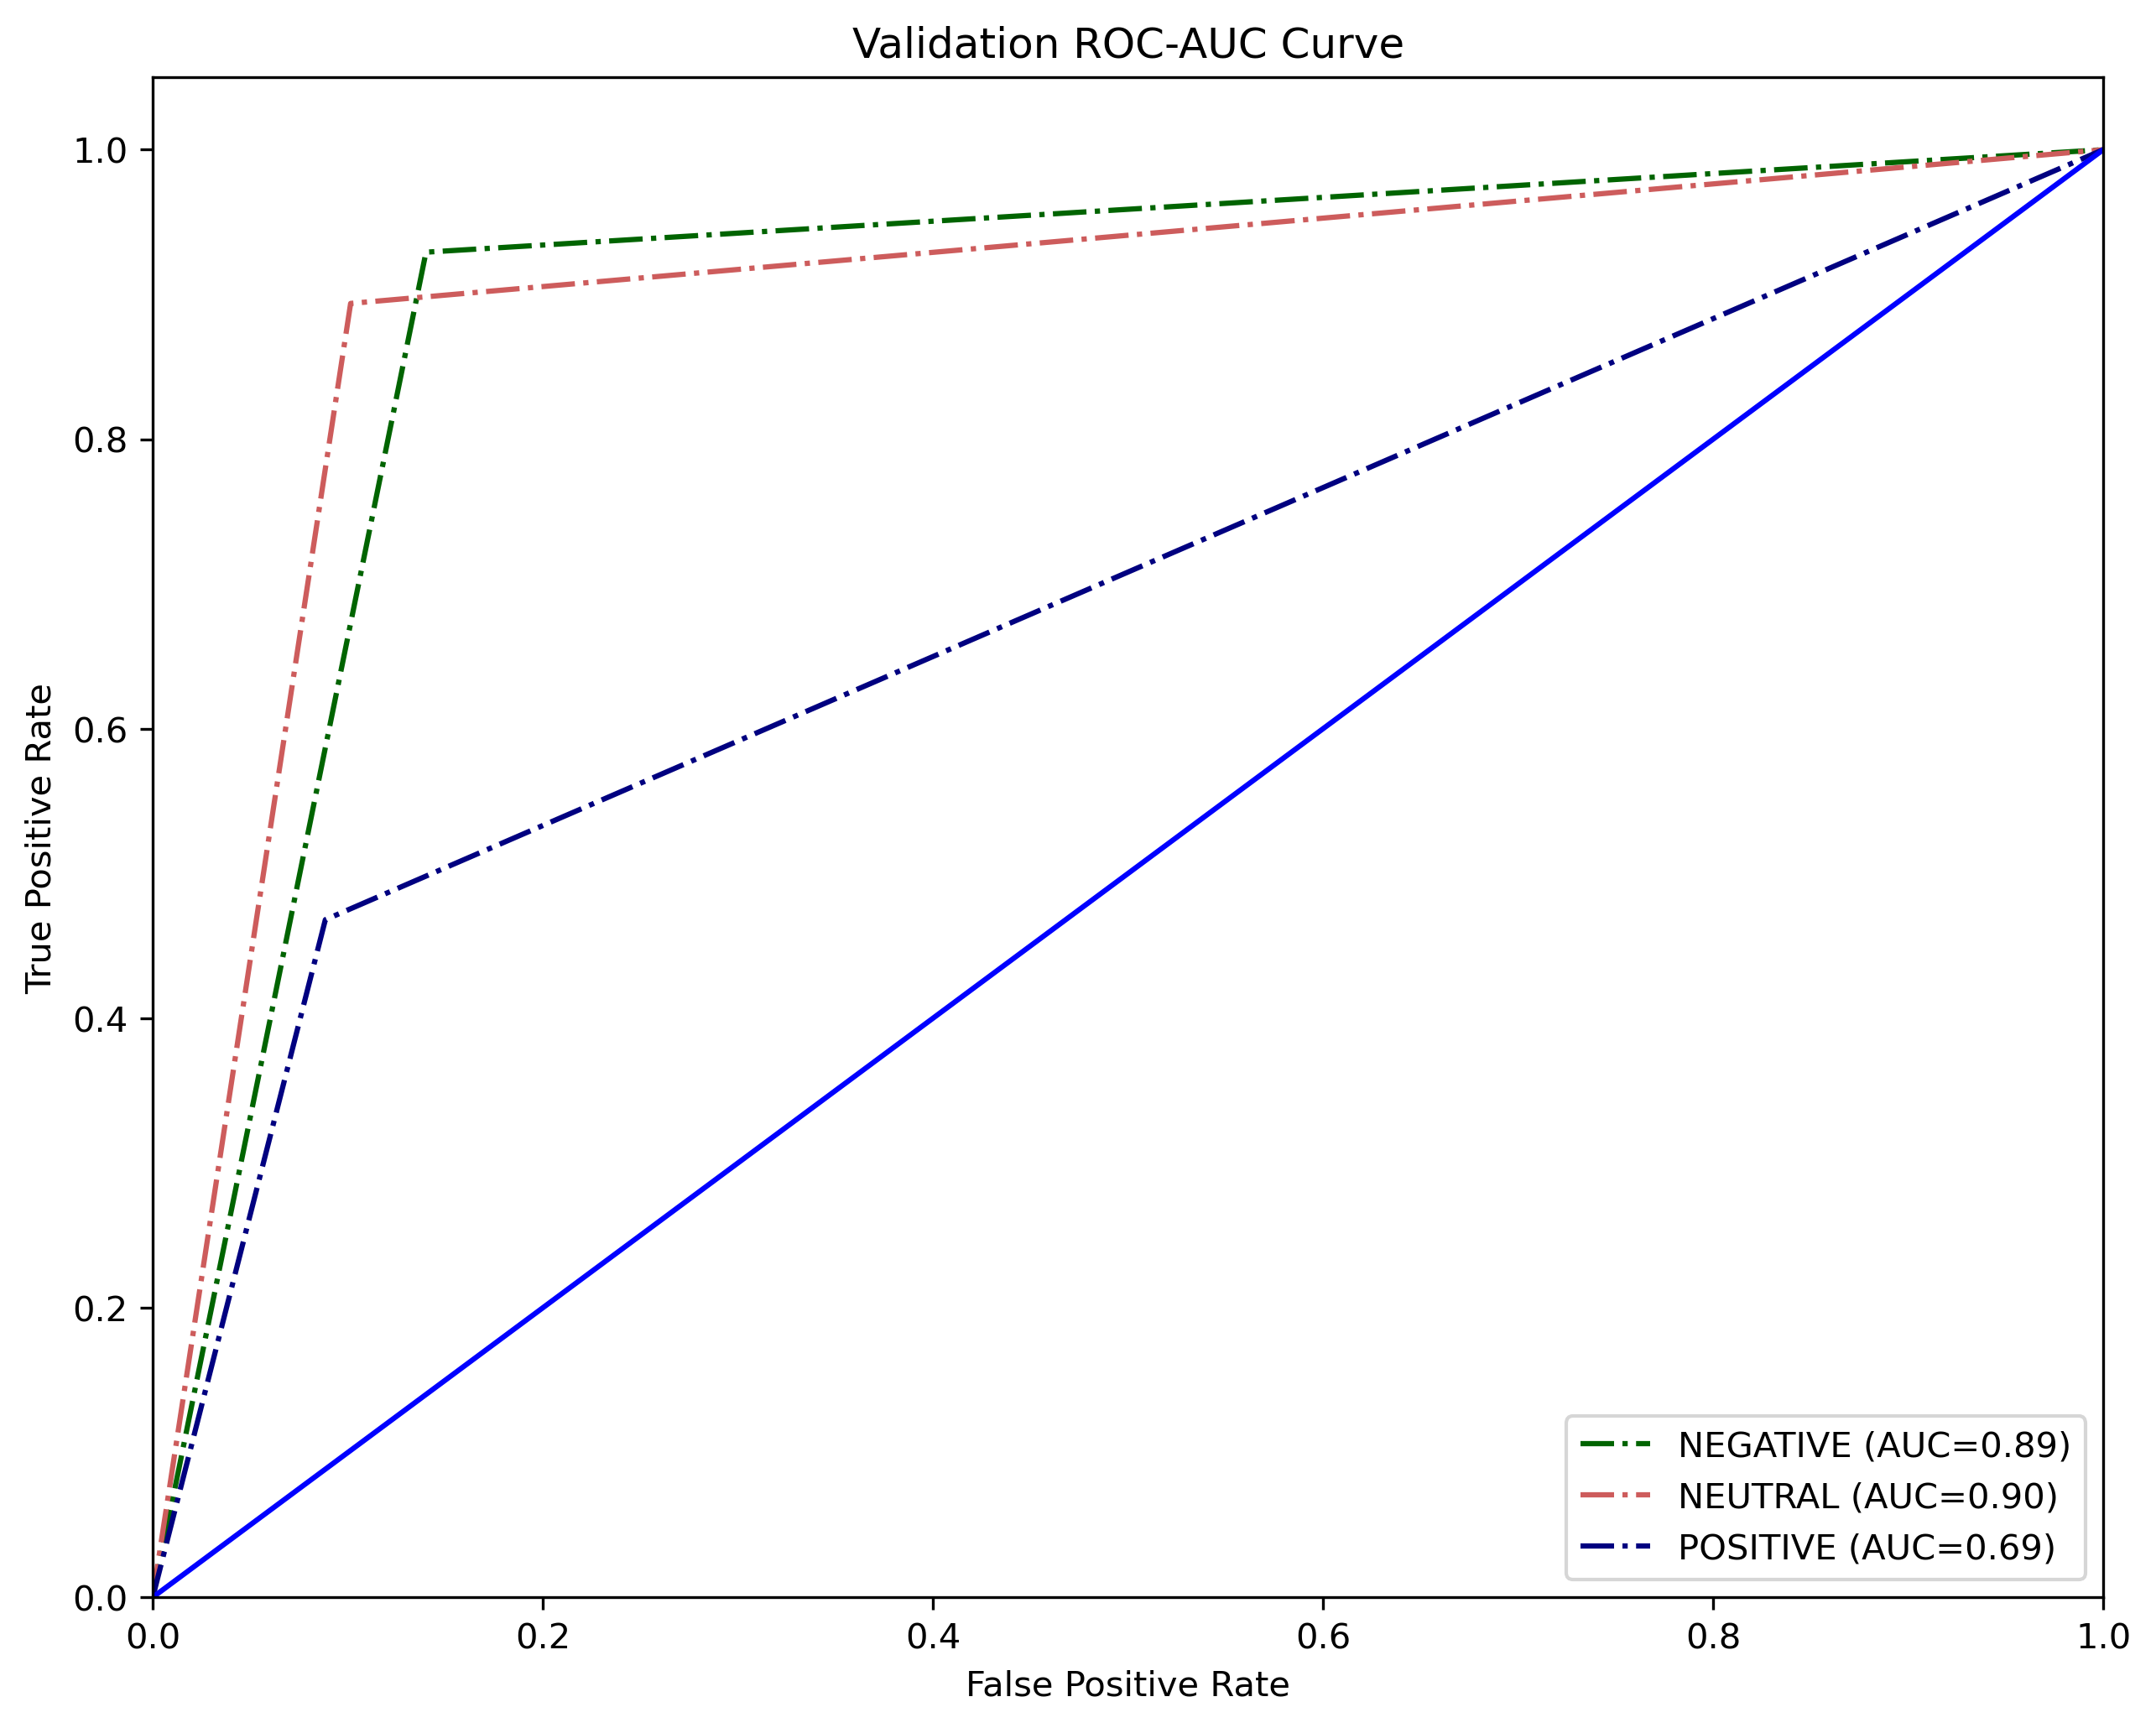

In [113]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_val[:,i],new_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

In [115]:
y1=y.flatten()

In [116]:
new_y=label_binarize(y1,classes=np.unique(y1))

In [118]:
new_pred_y=label_binarize(y_new,classes=np.unique(y_new))

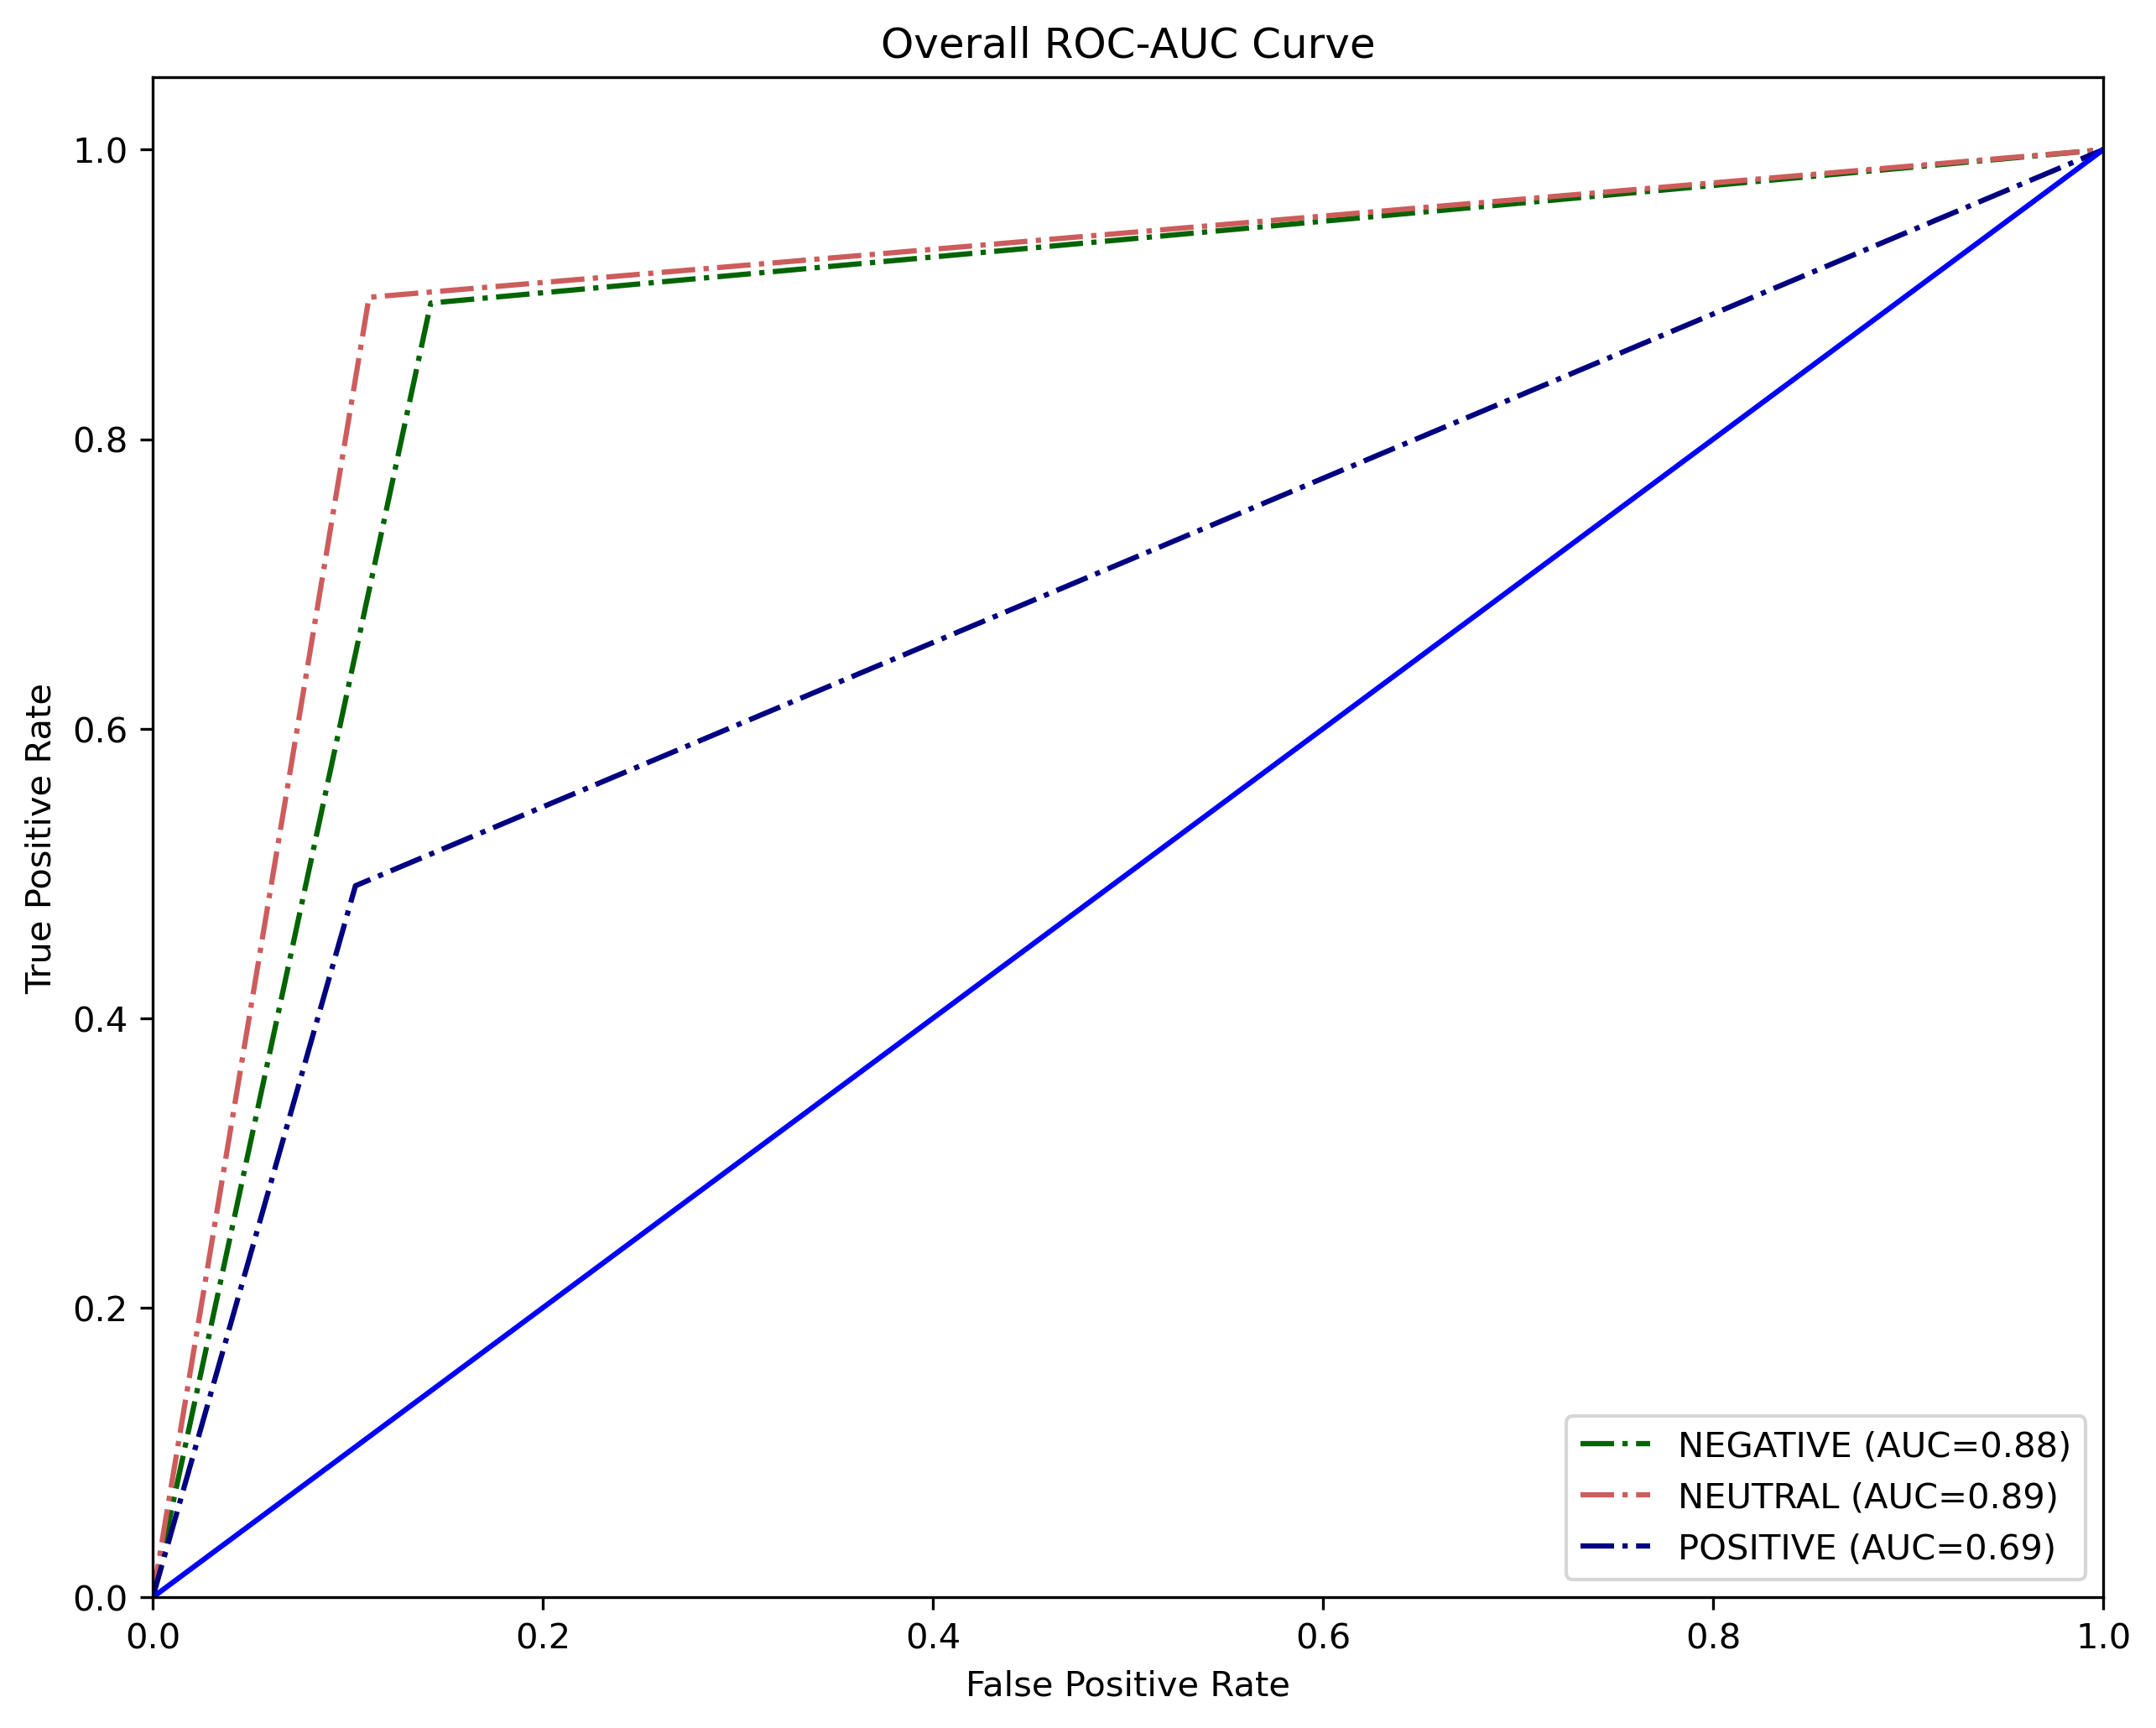

In [119]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_y[:,i],new_pred_y[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)